In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import img_to_array
import nibabel as nib
from sklearn.model_selection import train_test_split

In [4]:
import os
import nibabel as nib
import matplotlib.pyplot as plt


In [5]:
folder_path = "C:\\Users\\satya\\tej"


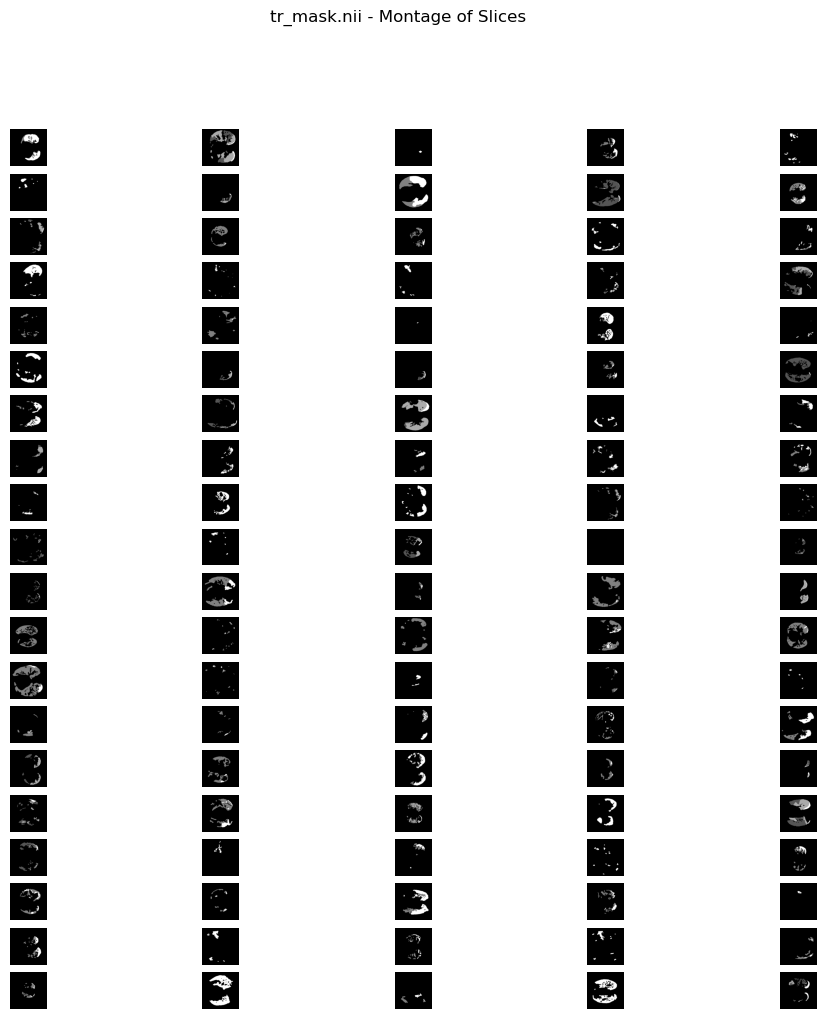

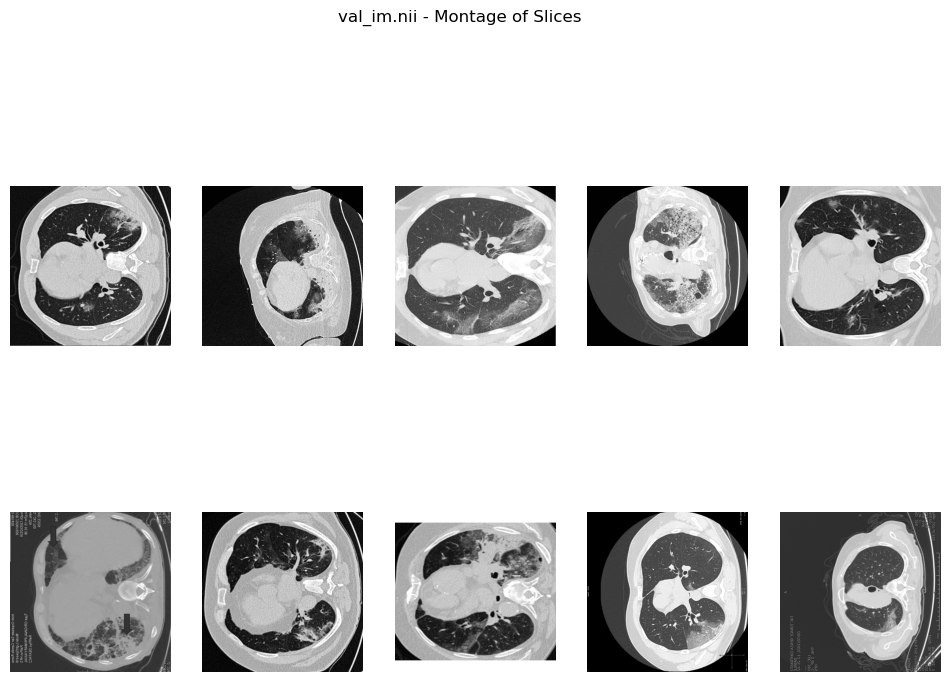

In [6]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

folder_path = "C:\\Users\\satya\\tej\\Label"

for file_name in os.listdir(folder_path):
    if file_name.endswith(".nii"):
        file_path = os.path.join(folder_path, file_name)
        img = nib.load(file_path)
        image_data = img.get_fdata()
        num_slices = image_data.shape[-1]
        montage_cols = 5
        montage_rows = (num_slices // montage_cols) + 1

        plt.figure(figsize=(12, 12))
        for i in range(num_slices):
            plt.subplot(montage_rows, montage_cols, i + 1)
            slice_data = image_data[:, :, i]
            plt.imshow(slice_data, cmap='gray')
            plt.axis('off')

        plt.suptitle(file_name + " - Montage of Slices")
        plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import MeanIoU
from tensorflow.data import Dataset

In [8]:
folder_path = "C:\\Users\\satya\\tej\\UL"


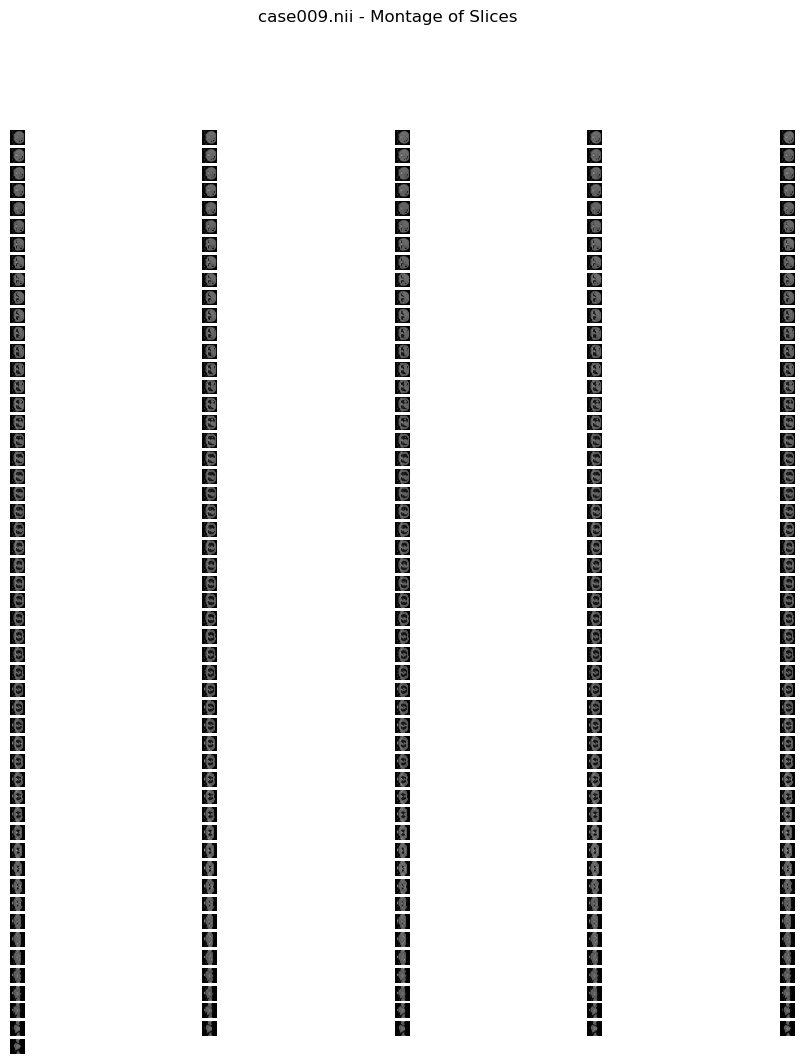

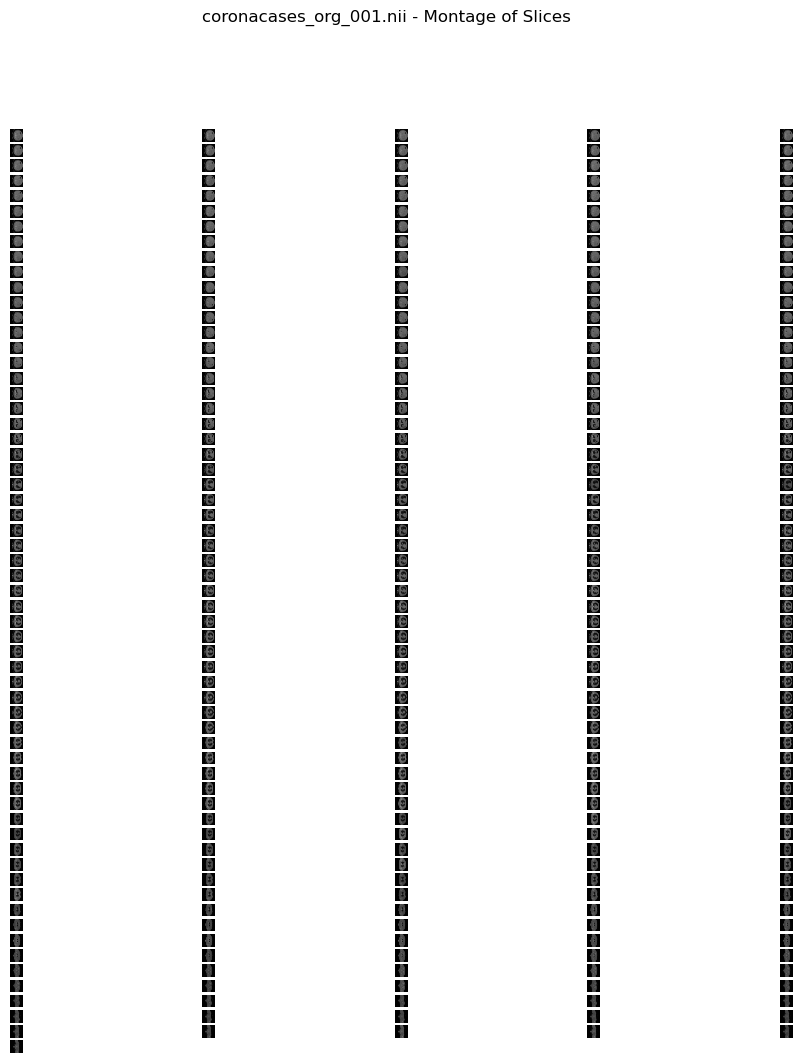

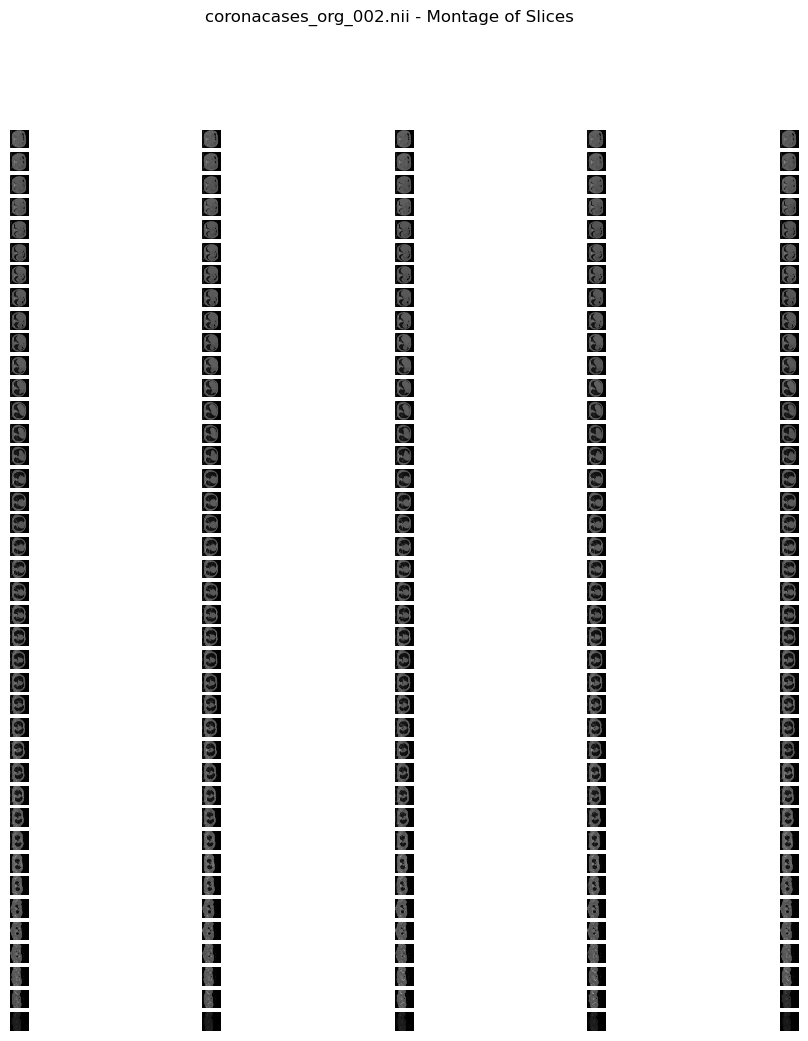

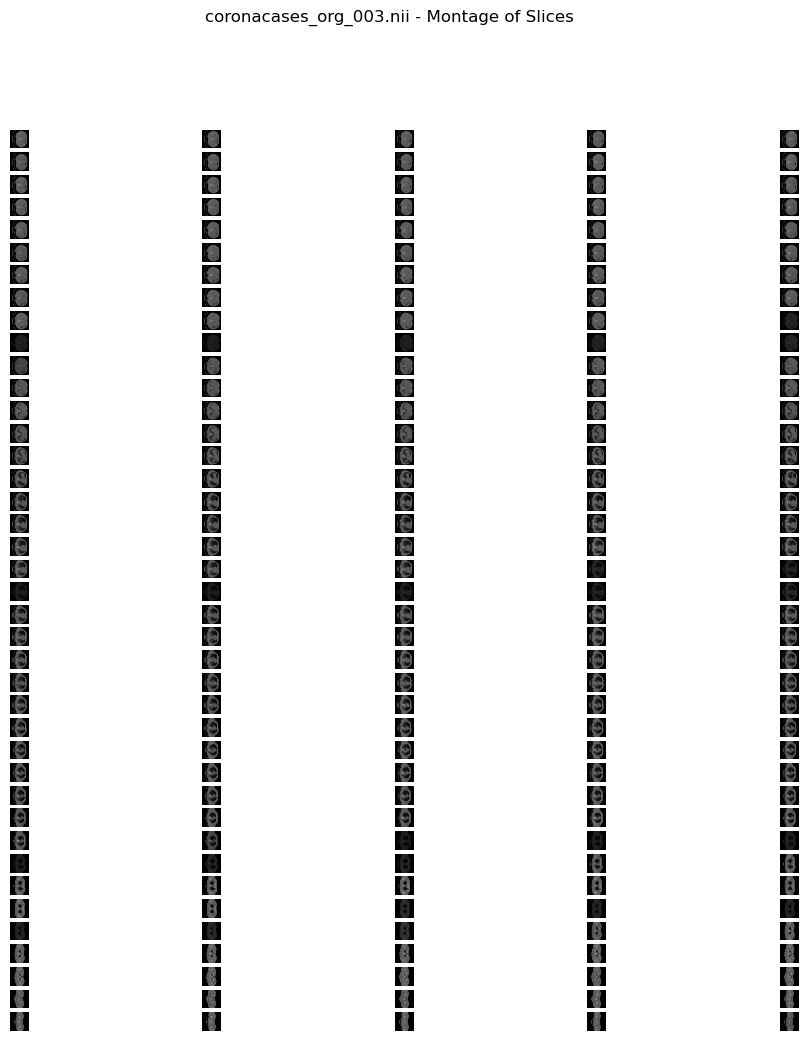

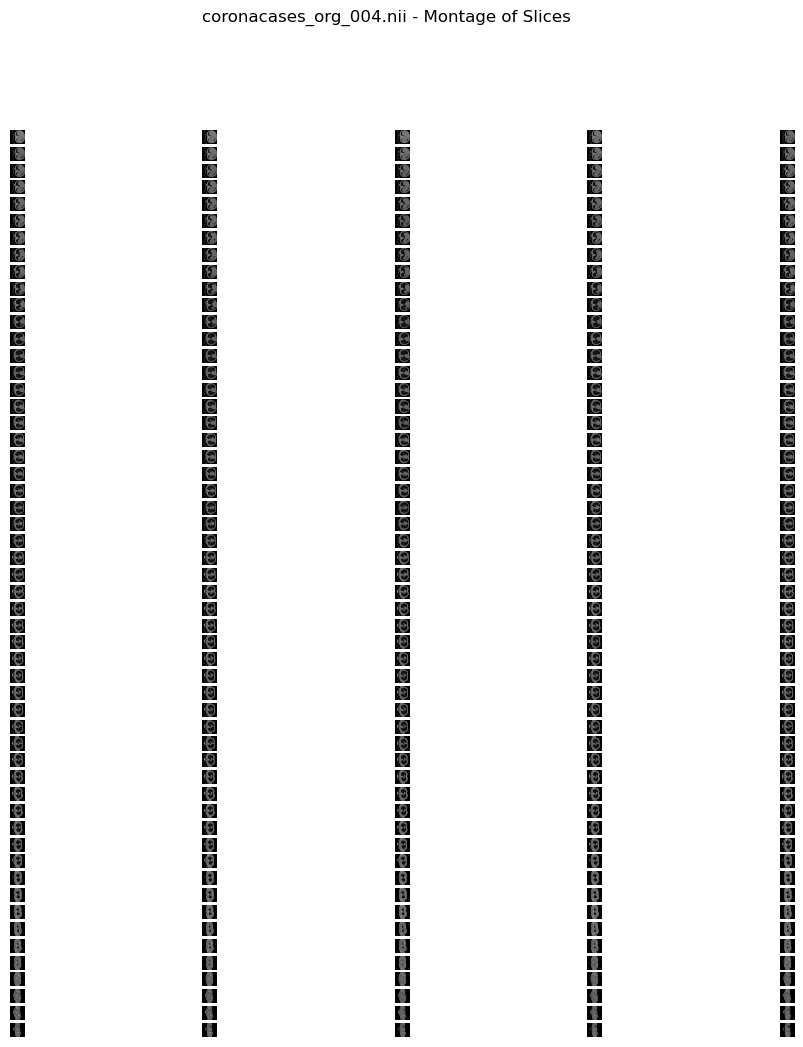

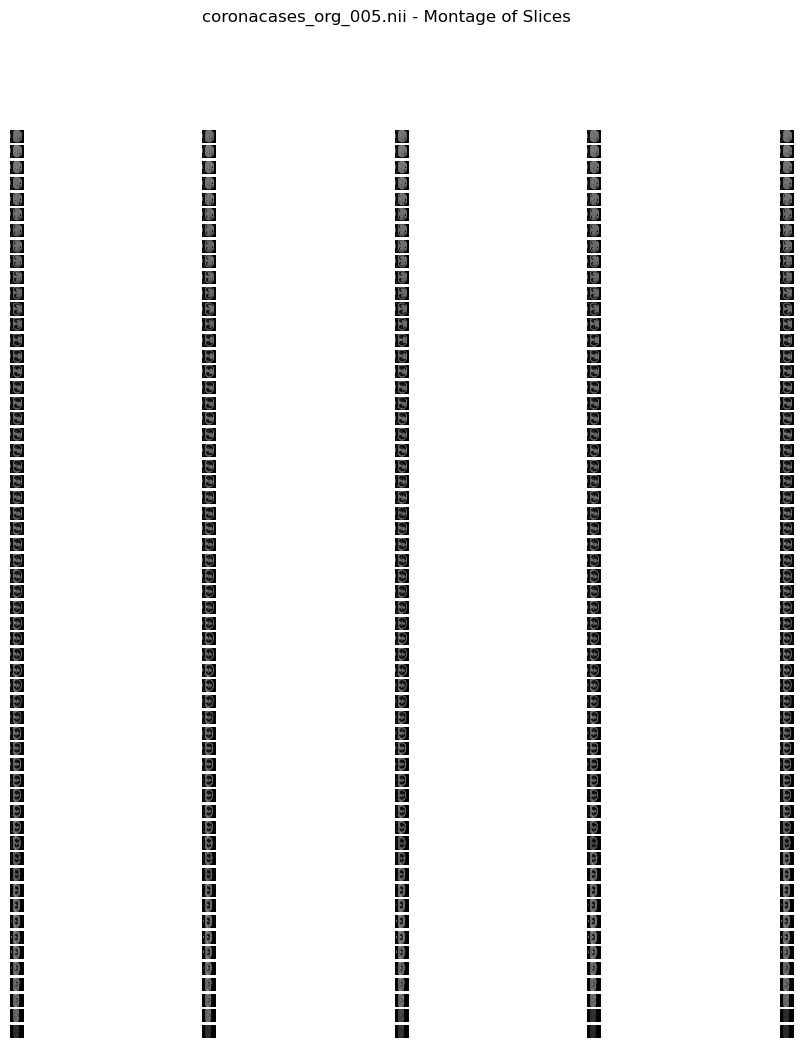

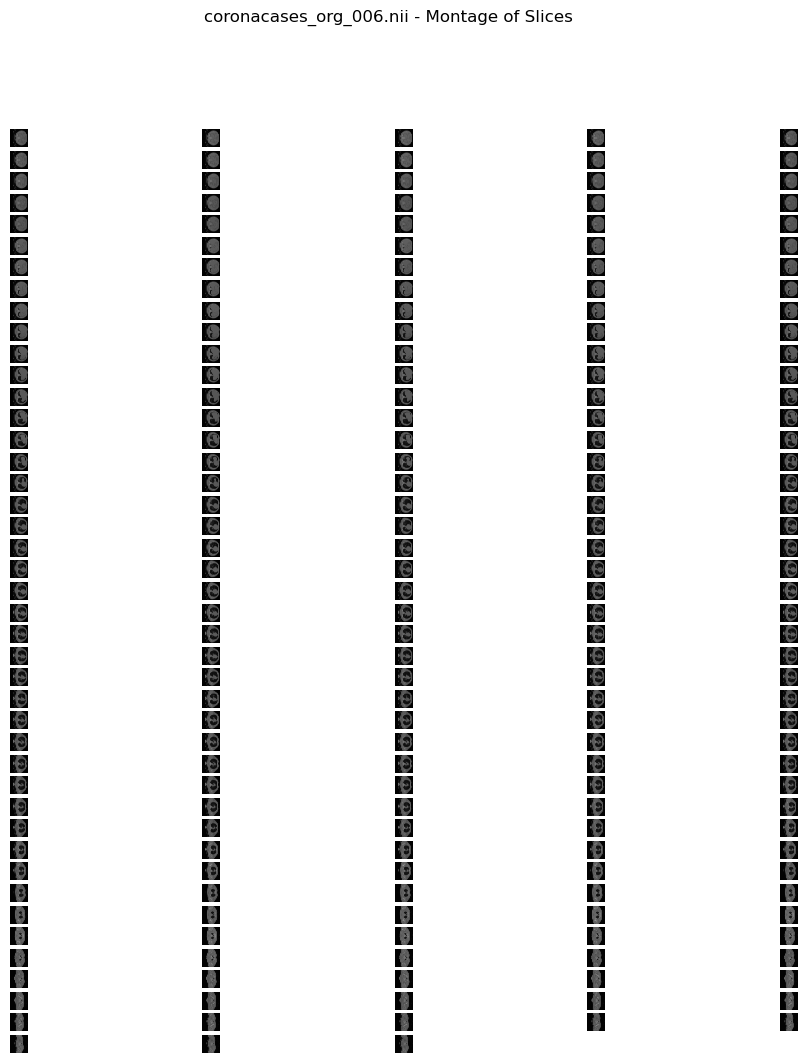

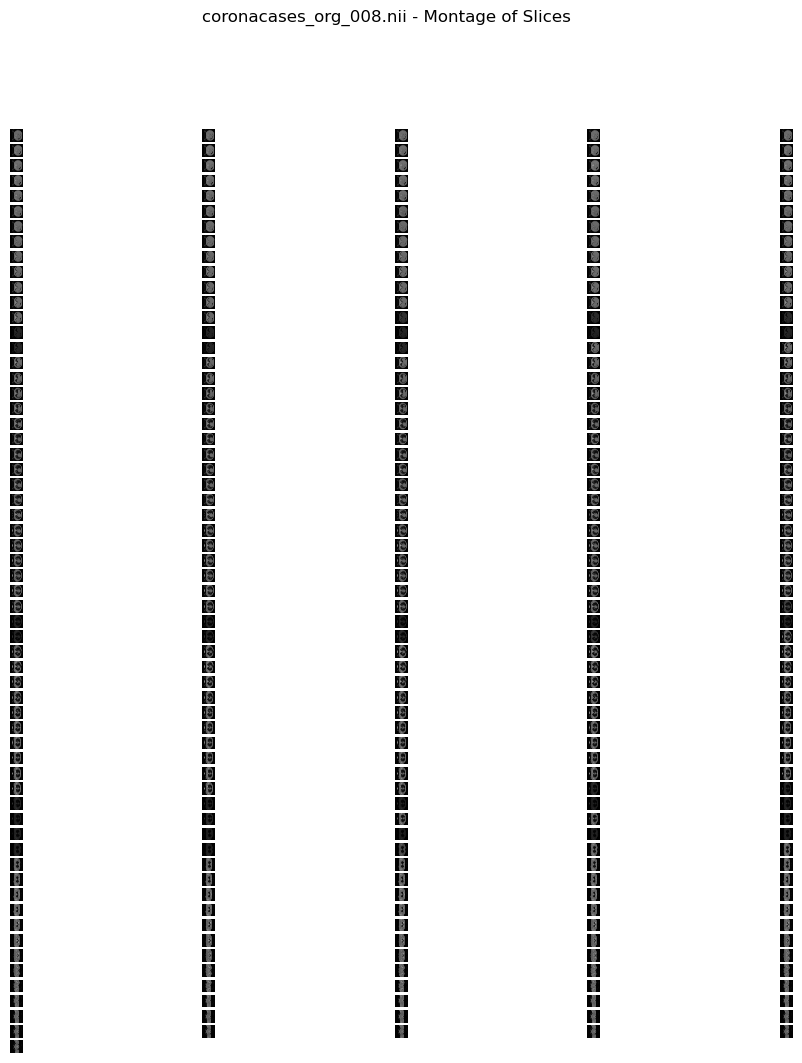

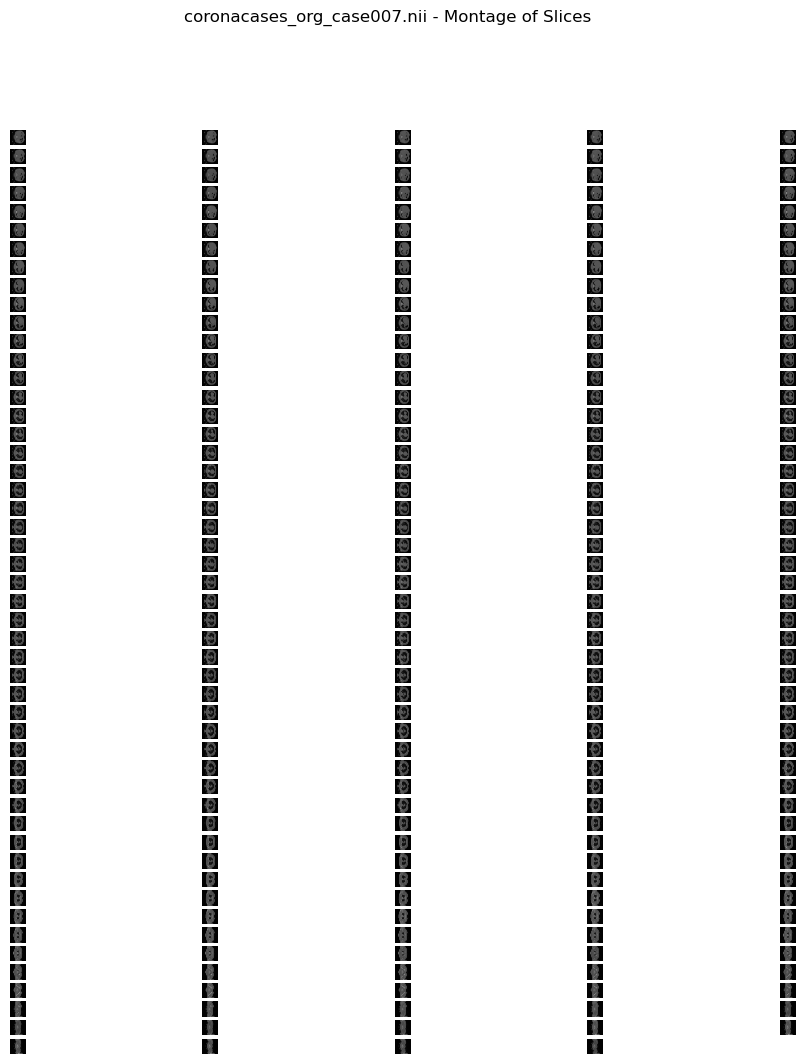

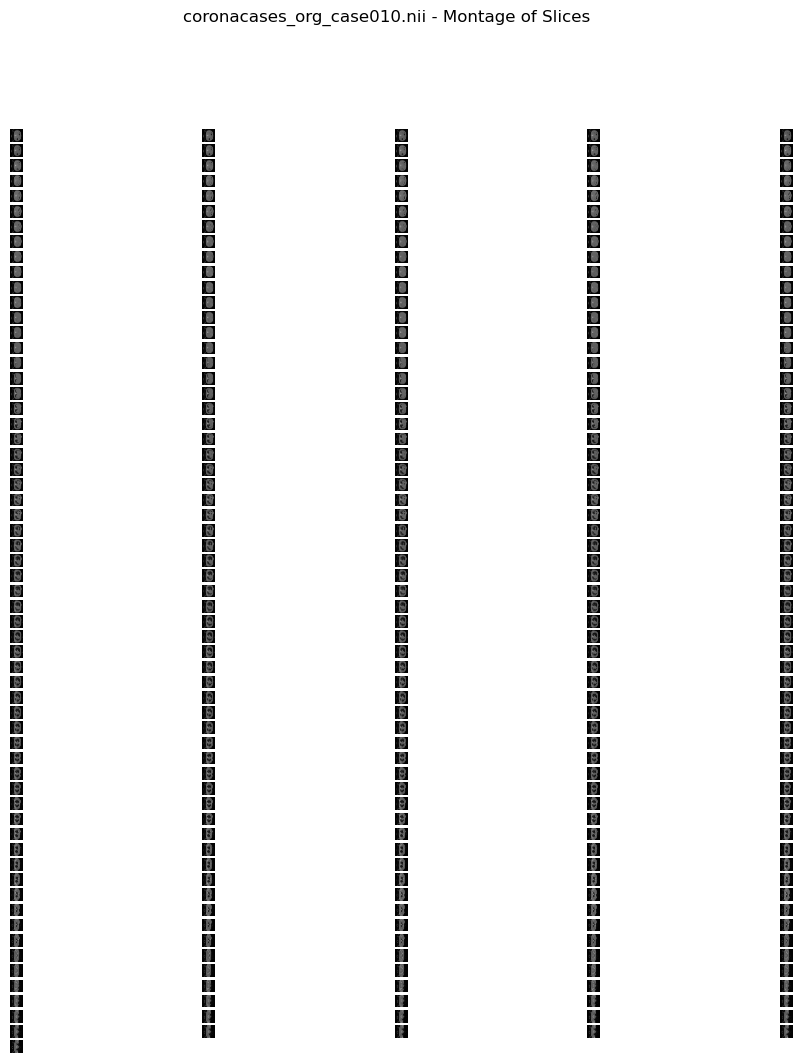

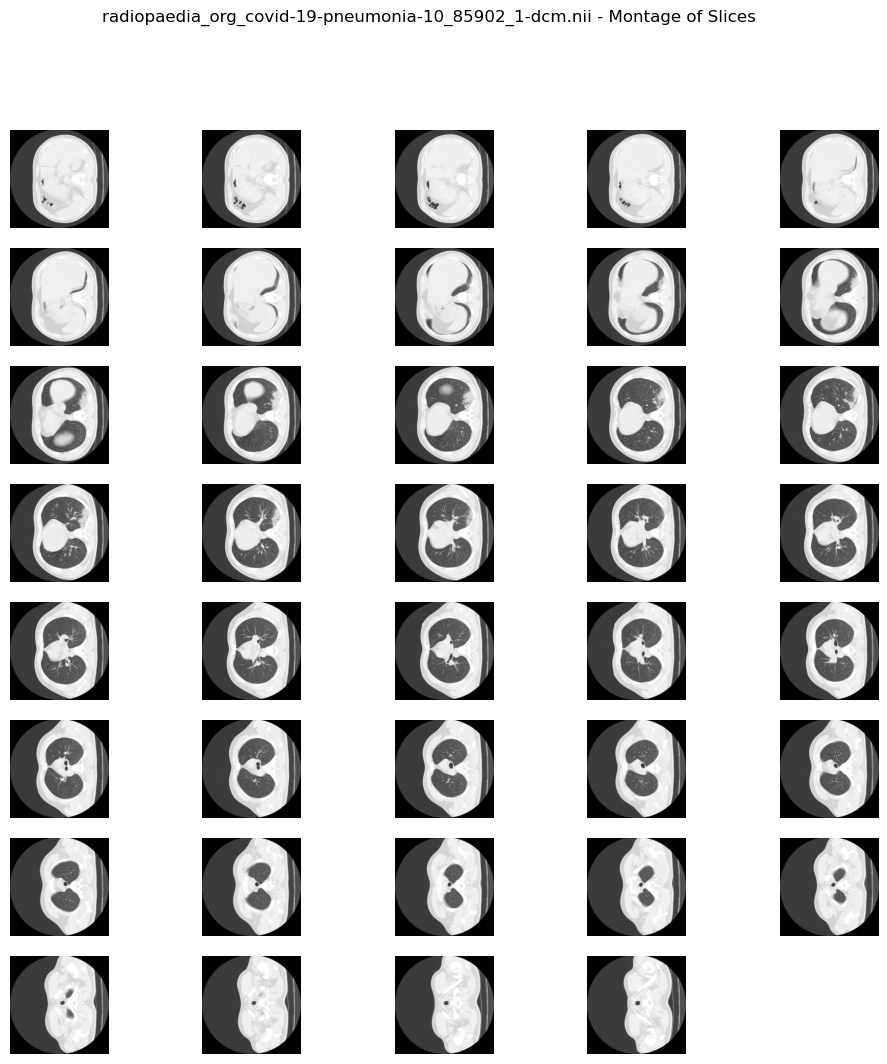

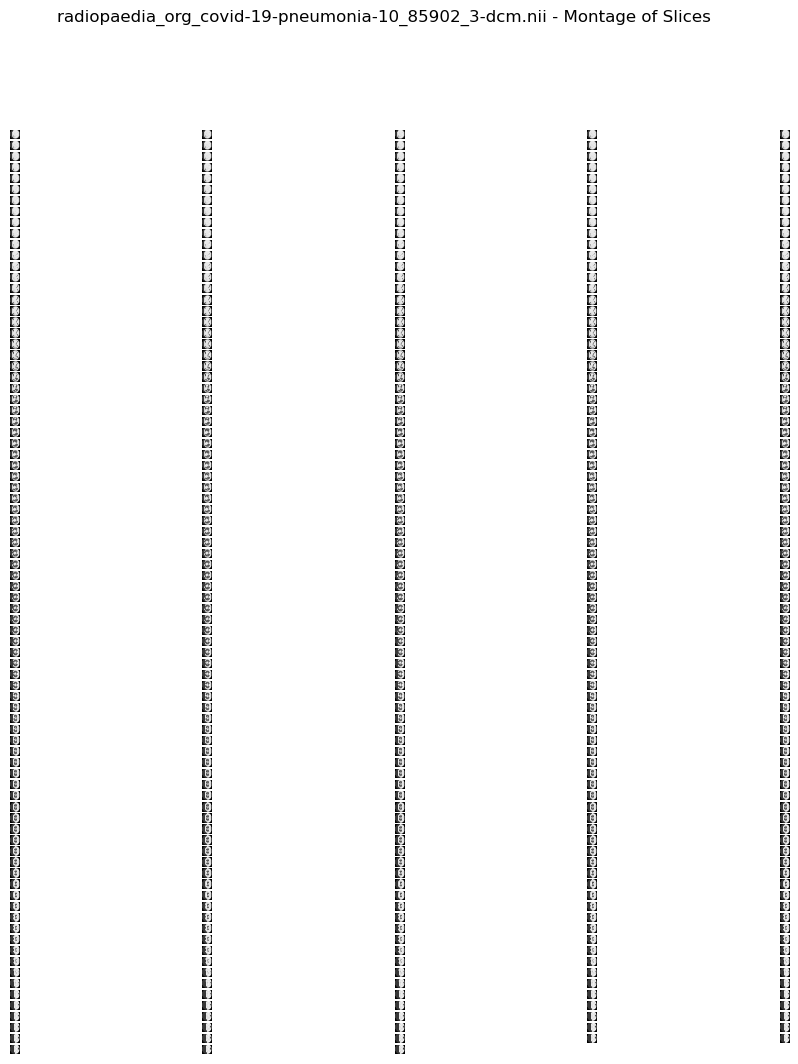

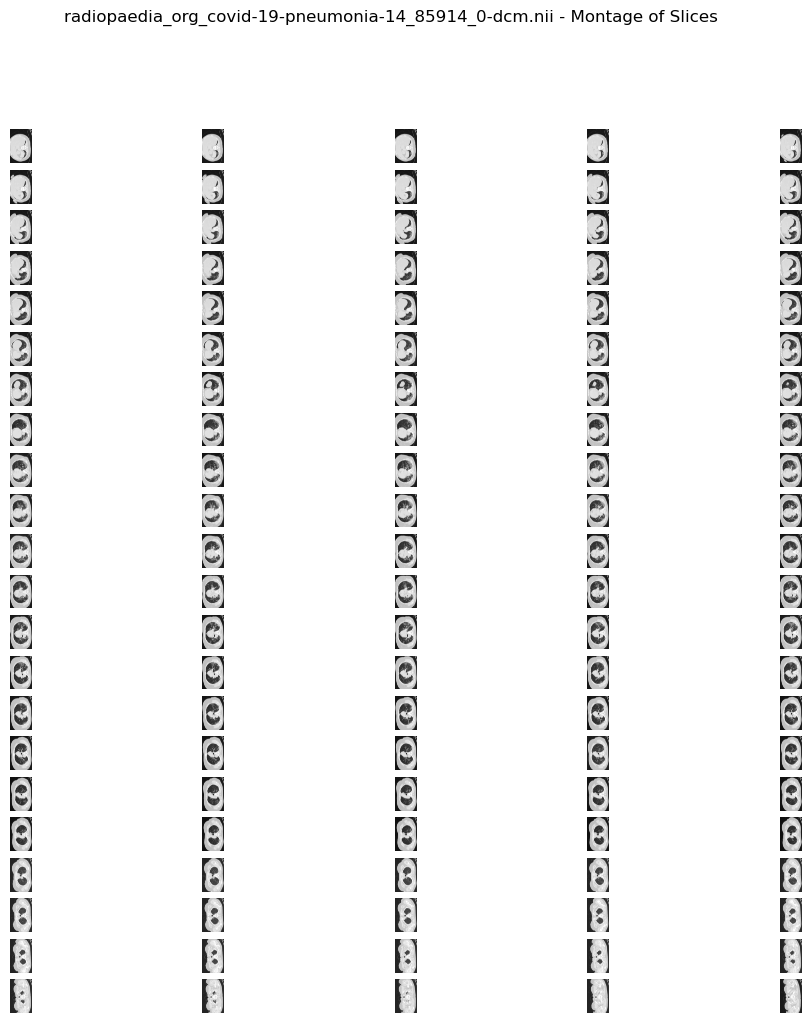

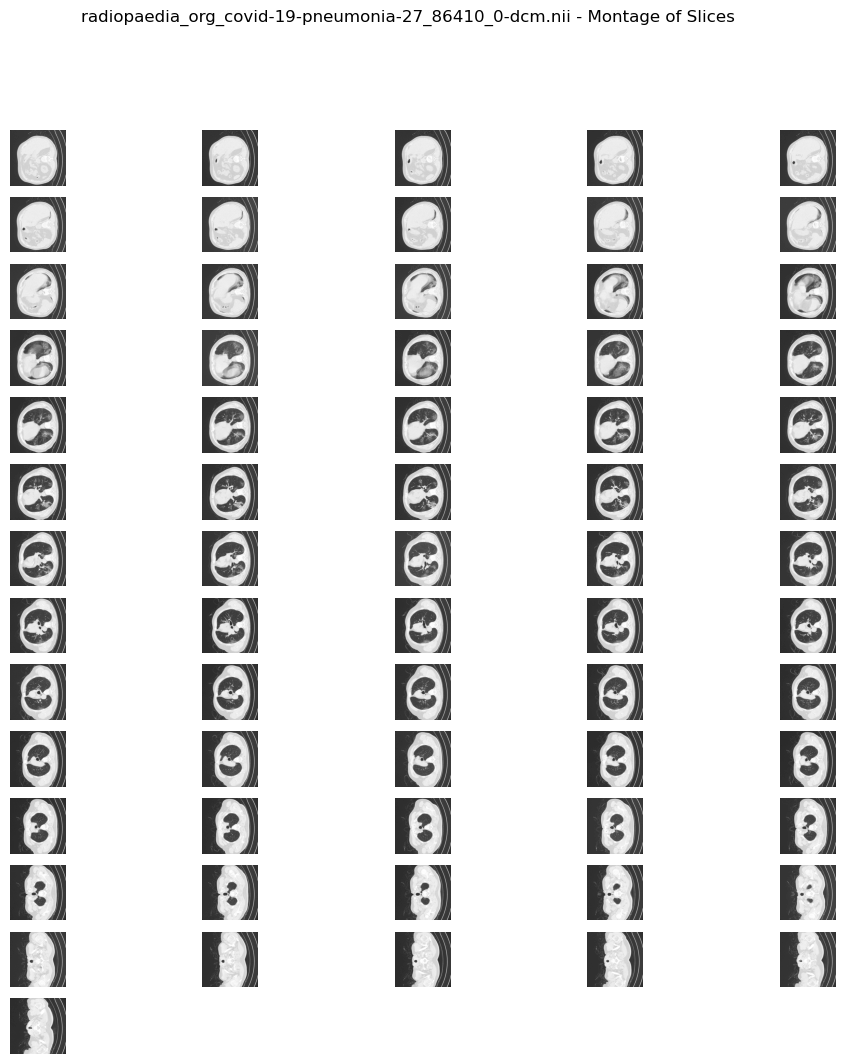

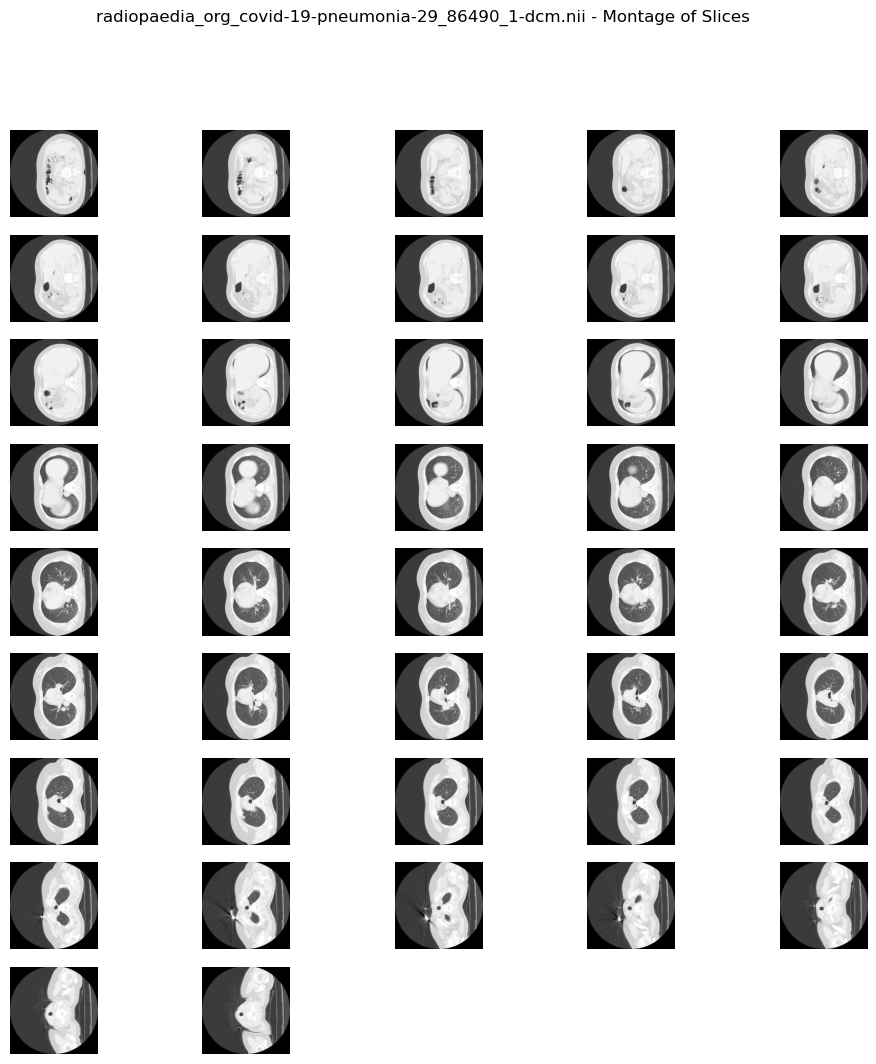

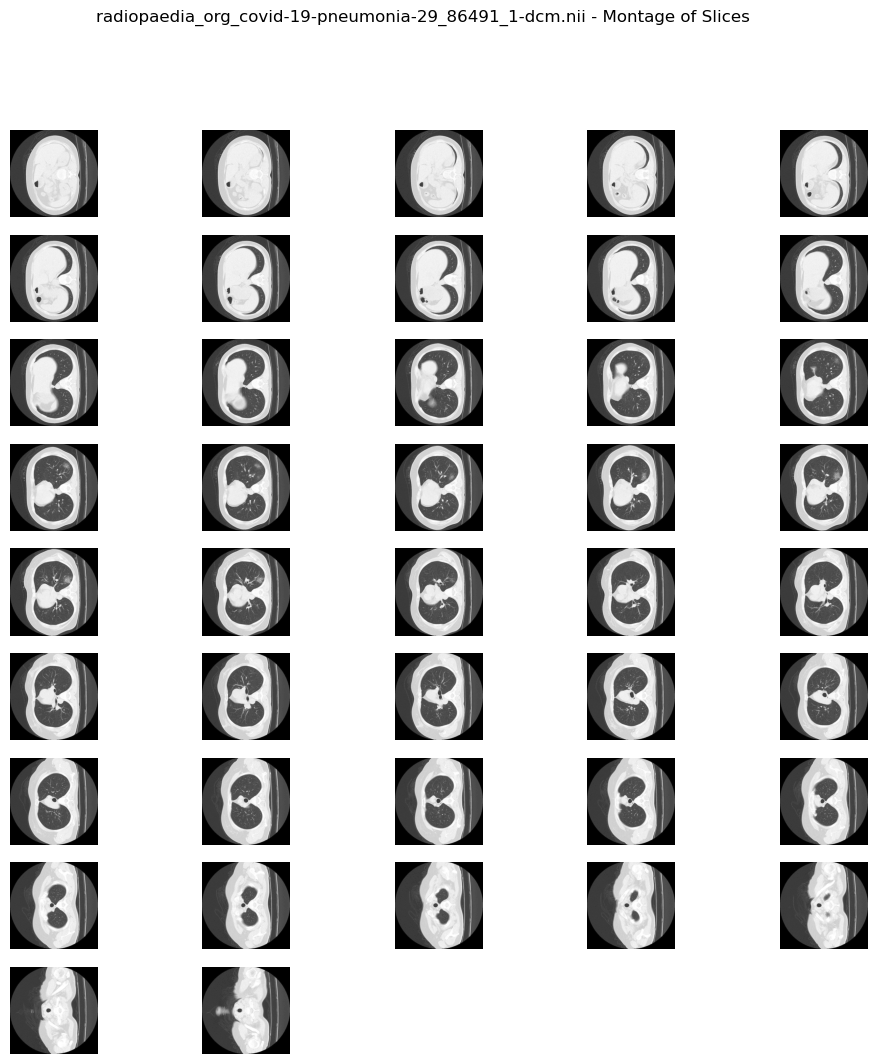

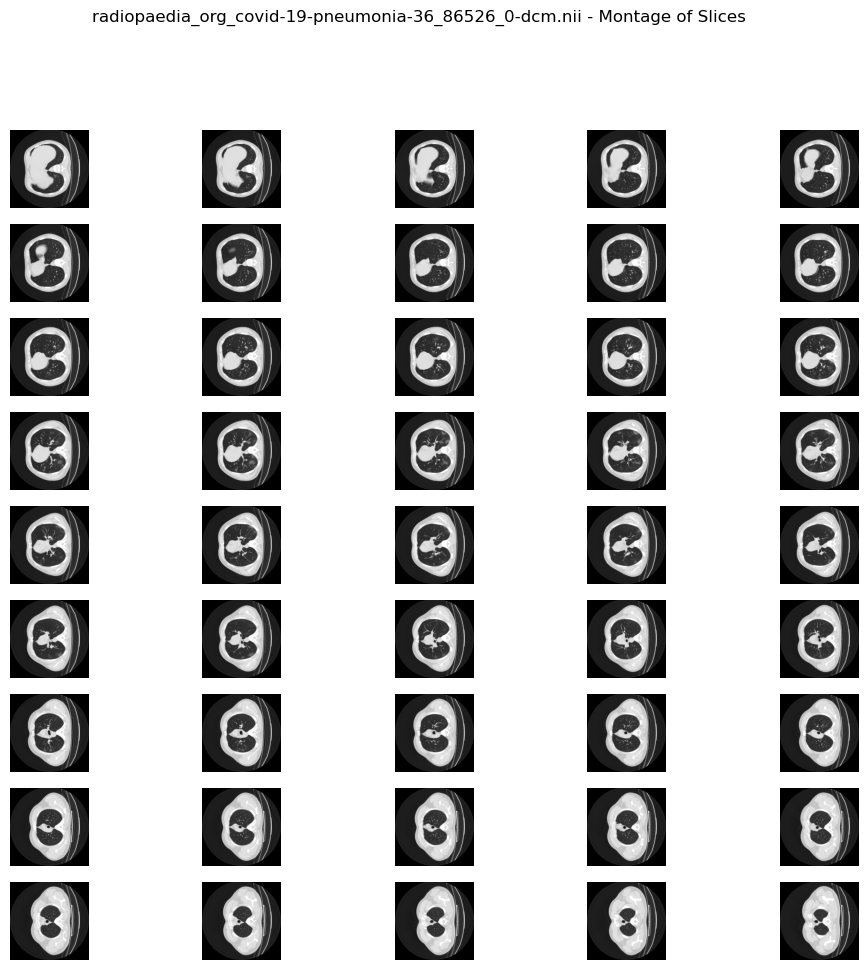

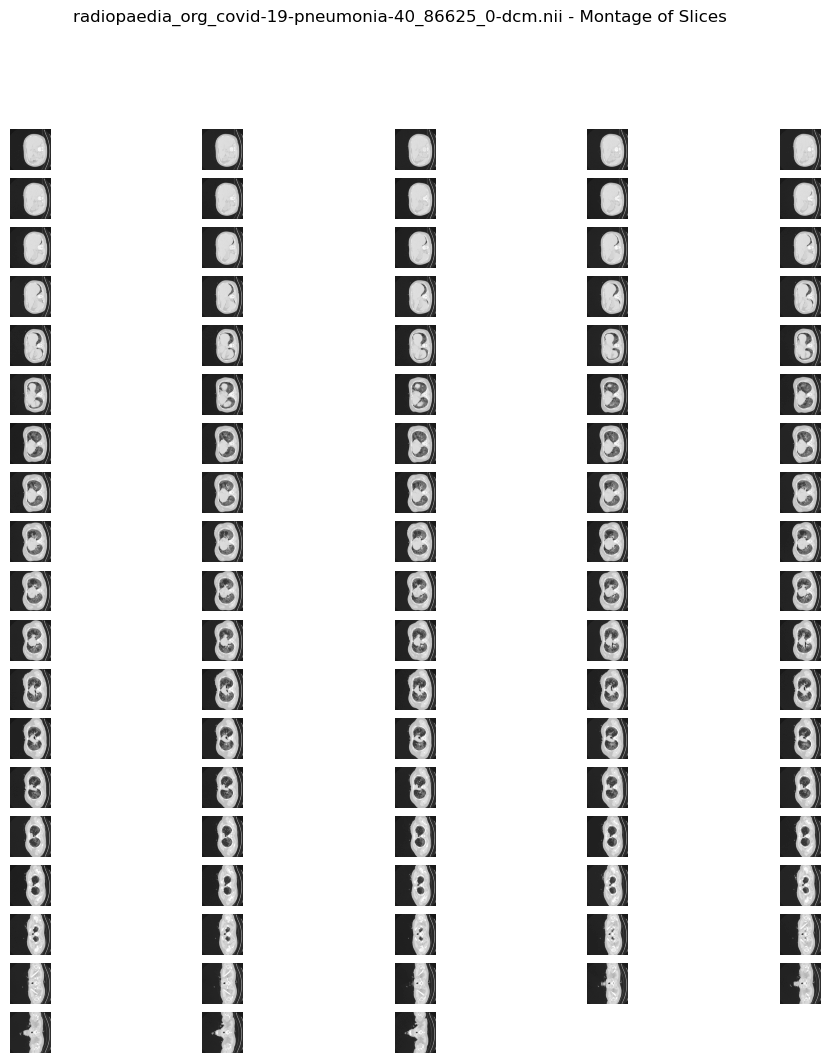

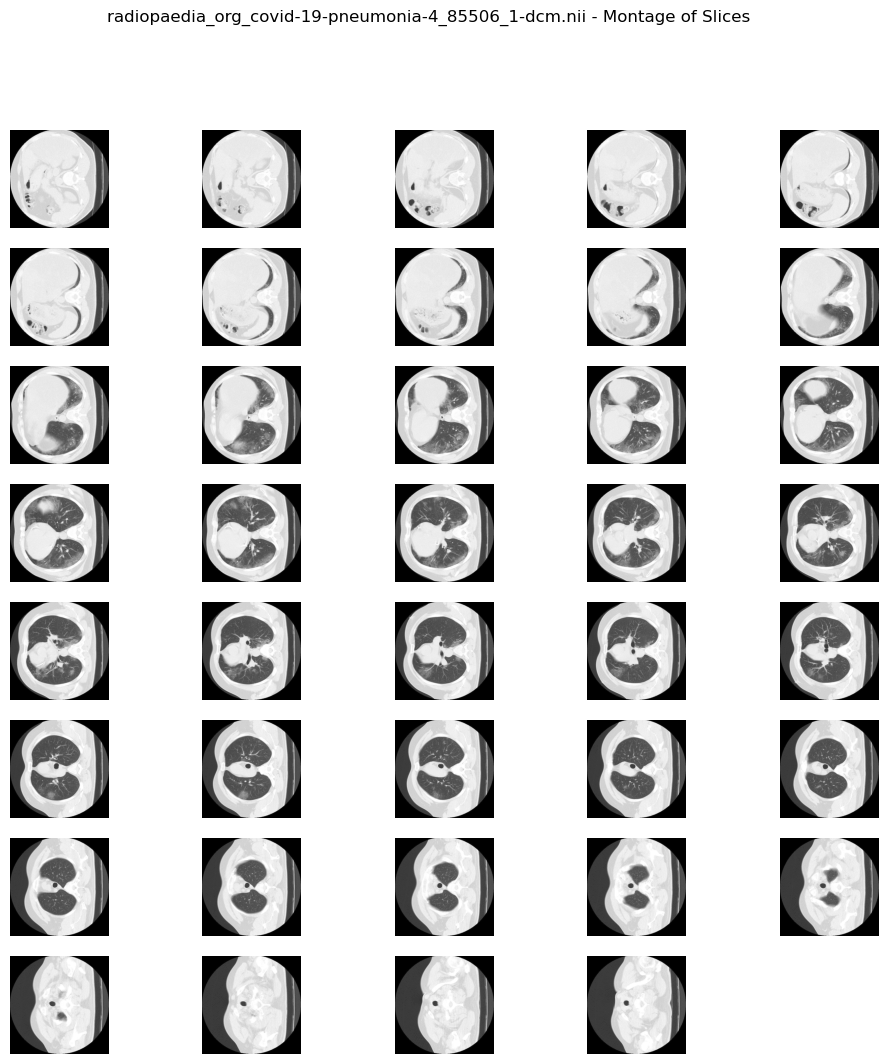

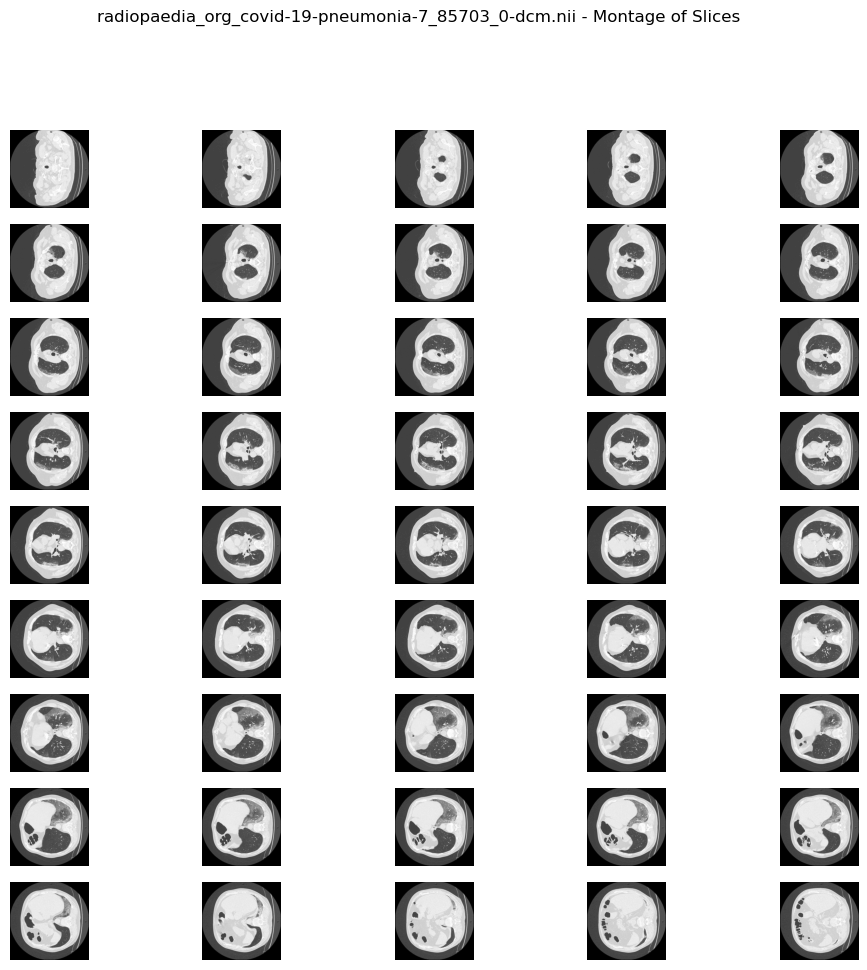

In [9]:
    
import os
import nibabel as nib
import matplotlib.pyplot as plt

folder_path = "C:\\Users\\satya\\tej\\UL"


for file_name in os.listdir(folder_path):
    if file_name.endswith(".nii"):
        file_path = os.path.join(folder_path, file_name)
        img = nib.load(file_path)
        image_data = img.get_fdata()
        num_slices = image_data.shape[-1]
        montage_cols = 5
        montage_rows = (num_slices // montage_cols) + 1

        plt.figure(figsize=(12, 12))
        for i in range(num_slices):
            plt.subplot(montage_rows, montage_cols, i + 1)
            slice_data = image_data[:, :, i]
            plt.imshow(slice_data, cmap='gray')
            plt.axis('off')

        plt.suptitle(file_name + " - Montage of Slices")
        plt.show()


In [10]:
import os
import numpy as np
import tensorflow as tf
import nibabel as nib

# Set the input and output folder paths
input_folder =  "C:\\Users\\satya\\tej\\Label"
output_folder = "C:\\Users\\satya\\tej\\Label_Resized"


# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate over the images in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith(".nii"):
        file_path = os.path.join(input_folder, file_name)
        img = nib.load(file_path)
        image_data = img.get_fdata()
        
        # Resize the image to 192x192 pixels
        resized_image = tf.image.resize(image_data, [192, 192], method=tf.image.ResizeMethod.BILINEAR)
        
        # Rescale the image data to the range [0, 1]
        rescaled_image = resized_image / np.max(resized_image)

        # Convert the EagerTensor to a NumPy array and specify the data type as float32
        rescaled_image = np.array(rescaled_image.numpy(), dtype=np.float32)
        
        # Save the resized and rescaled image
        output_file_path = os.path.join(output_folder, file_name)
        nib.save(nib.Nifti1Image(rescaled_image, img.affine), output_file_path)


In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

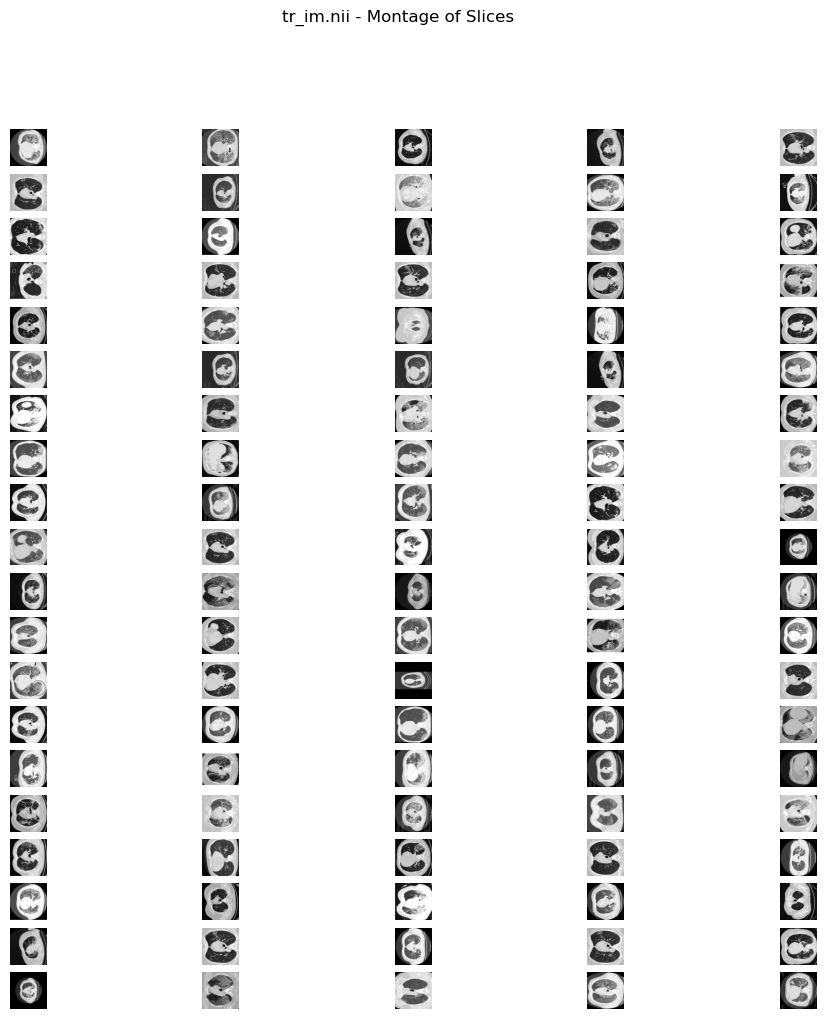

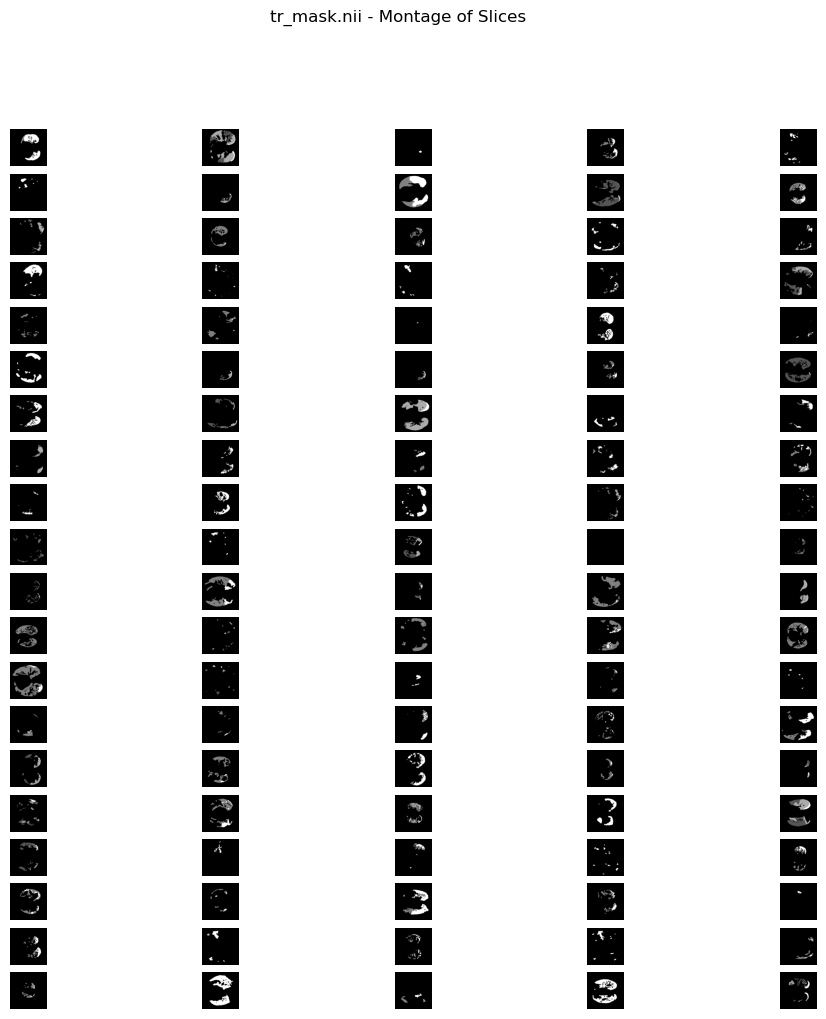

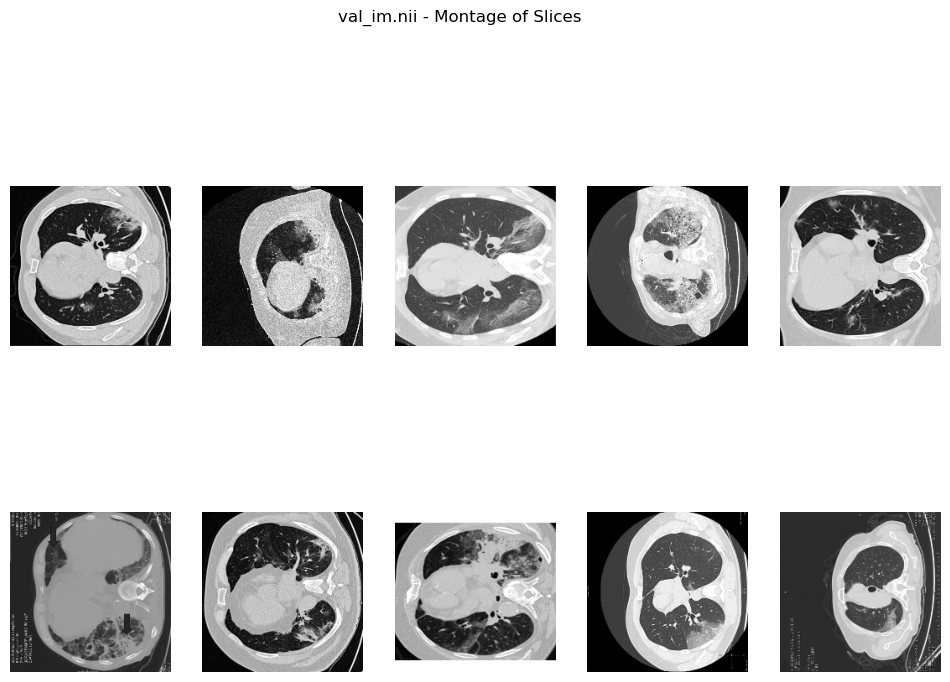

In [12]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

folder_path ="C:\\Users\\satya\\tej\\Label_Resized"

for file_name in os.listdir(folder_path):
    if file_name.endswith(".nii"):
        file_path = os.path.join(folder_path, file_name)
        img = nib.load(file_path)
        image_data = img.get_fdata()
        num_slices = image_data.shape[-1]
        montage_cols = 5
        montage_rows = (num_slices // montage_cols) + 1

        plt.figure(figsize=(12, 12))
        for i in range(num_slices):
            plt.subplot(montage_rows, montage_cols, i + 1)
            slice_data = image_data[:, :, i]
            plt.imshow(slice_data, cmap='gray')
            plt.axis('off')

        plt.suptitle(file_name + " - Montage of Slices")
        plt.show()


In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import nibabel as nib
from skimage.transform import resize

# Set the folder path for the data
data_folder = "C:\\Users\\satya\\tej\\Label_Resized"

# Function to load NIfTI images and resize them
def load_and_resize_nifti_image(file_path, target_shape):
    img = nib.load(file_path)
    image_data = img.get_fdata()
    resized_image = resize(image_data, target_shape)
    return resized_image

# Define the target shape for resizing
target_shape = (192, 192)

# Load training image
train_images_path = os.path.join(data_folder, "tr_im.nii")
train_images = load_and_resize_nifti_image(train_images_path, target_shape)

# Load training mask
train_masks_path = os.path.join(data_folder, "tr_mask.nii")
train_masks = load_and_resize_nifti_image(train_masks_path, target_shape)

# Normalize the images and masks
train_images = train_images / 255.0
train_masks = train_masks / 255.0


In [14]:
image_shape = train_images.shape
if len(image_shape) == 2:
    # Image is 2D grayscale without a depth dimension
    train_images = np.reshape(train_images, (*image_shape, 1))
elif len(image_shape) == 3:
    # Image is 3D with a depth dimension
    # Assuming the depth is the last dimension
    train_images = np.reshape(train_images, (*image_shape, 1))
else:
    # Handle unsupported image shape
    raise ValueError("Unsupported image shape")


In [15]:
print(train_images.shape)


(192, 192, 100, 1)


In [16]:
# Split the data into training and validation sets
split = int(0.8 * len(train_images))
train_images, val_images = train_images[:split], train_images[split:]
train_masks, val_masks = train_masks[:split], train_masks[split:]

In [17]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the U-Net model with the correct input shape
inputs = layers.Input(shape=(192, 192, 3))  # Assuming RGB images with 3 channels


# Define the U-Net model
inputs = layers.Input(shape=(192, 192, 1))

# Contracting path
conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv1)
pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(pool1)
conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv2)
pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(pool2)
conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv3)
pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(pool3)
conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv4)
pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(pool4)
conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(conv5)

# Expanding path
up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding="same")(conv5)
concat6 = layers.concatenate([up6, conv4], axis=3)
conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(concat6)
conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv6)

up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding="same")(conv6)
concat7 = layers.concatenate([up7, conv3], axis=3)
conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(concat7)
conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv7)

up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding="same")(conv7)
concat8 = layers.concatenate([up8, conv2], axis=3)
conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(concat8)
conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv8)

up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding="same")(conv8)
concat9 = layers.concatenate([up9, conv1], axis=3)
conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(concat9)
conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv9)

outputs = layers.Conv2D(1, 1, activation="sigmoid")(conv9)

# Create the model by specifying the input and output
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [19]:
# import cv2
# import numpy as np

# # Resize train images
# resized_train_images = []
# for image in train_images:
#     resized = cv2.resize(image, (192, 192))
#     resized_train_images.append(resized)

# resized_train_images = np.array(resized_train_images)

# # Resize validation images
# resized_val_images = []
# for image in val_images:
#     resized = cv2.resize(image, (192, 192))
#     resized_val_images.append(resized)

# resized_val_images = np.array(resized_val_images)

# # Resize train masks
# resized_train_masks = []
# for mask in train_masks:
#     resized = cv2.resize(mask, (192, 192))
#     resized_train_masks.append(resized)

# resized_train_masks = np.array(resized_train_masks)

# # Resize validation masks
# resized_val_masks = []
# for mask in val_masks:
#     resized = cv2.resize(mask, (192, 192))
#     resized_val_masks.append(resized)

# resized_val_masks = np.array(resized_val_masks)

# # Fit the model with resized images and masks
# epochs = 10
# batch_size = 16
# model.fit(resized_train_images, resized_train_masks, batch_size=batch_size, epochs=epochs, validation_data=(resized_val_images, resized_val_masks))
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Resize images
def resize_images(images):
    resized_images = []
    for image in images:
        resized = cv2.resize(image, (192, 192))
        resized_images.append(resized)
    return np.array(resized_images)

# Preprocess the data
resized_train_images = resize_images(train_images)
resized_val_images = resize_images(val_images)
resized_train_masks = resize_images(train_masks)
resized_val_masks = resize_images(val_masks)

# Define the U-Net model
inputs = layers.Input(shape=(192, 192, 1))

# Contracting path
conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv1)
pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(pool1)
conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv2)
pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(pool2)
conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv3)
pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(pool3)
conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv4)
pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(pool4)
conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(conv5)

# Expanding path
up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding="same")(conv5)
concat6 = layers.concatenate([up6, conv4], axis=3)
conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(concat6)
conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv6)

up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding="same")(conv6)
concat7 = layers.concatenate([up7, conv3], axis=3)
conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(concat7)
conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv7)

up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding="same")(conv7)
concat8 = layers.concatenate([up8, conv2], axis=3)
conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(concat8)
conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv8)

up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding="same")(conv8)
concat9 = layers.concatenate([up9, conv1], axis=3)
conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(concat9)
conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv9)

outputs = layers.Conv2D(1, 1, activation="sigmoid")(conv9)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])



# Define the training function
def train_model(model, train_images, train_masks, val_images, val_masks, epochs, batch_size):
    model.fit(train_images, train_masks, batch_size=batch_size, epochs=epochs, validation_data=(val_images, val_masks))

# Train the model
epochs = 10
batch_size = 16
train_model(model, resized_train_images, resized_train_masks, resized_val_images, resized_val_masks, epochs, batch_size)


Epoch 1/10
10/10 [==============================] - 177s 17s/step - loss: 0.3385 - accuracy: 0.8116 - val_loss: 0.0013 - val_accuracy: 0.9086
Epoch 2/10
10/10 [==============================] - 172s 17s/step - loss: 0.0021 - accuracy: 0.8560 - val_loss: 0.0013 - val_accuracy: 0.9086
Epoch 3/10
10/10 [==============================] - 177s 18s/step - loss: 0.0021 - accuracy: 0.8560 - val_loss: 0.0013 - val_accuracy: 0.9086
Epoch 4/10
10/10 [==============================] - 191s 19s/step - loss: 0.0021 - accuracy: 0.8560 - val_loss: 0.0013 - val_accuracy: 0.9086
Epoch 5/10
10/10 [==============================] - 183s 18s/step - loss: 0.0021 - accuracy: 0.8560 - val_loss: 0.0013 - val_accuracy: 0.9086
Epoch 6/10
10/10 [==============================] - 171s 17s/step - loss: 0.0021 - accuracy: 0.8560 - val_loss: 0.0013 - val_accuracy: 0.9086
Epoch 7/10
10/10 [==============================] - 216s 22s/step - loss: 0.0021 - accuracy: 0.8560 - val_loss: 0.0013 - val_accuracy: 0.9086
Epoch 

In [20]:
# Save the trained model
model.save('model')


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [21]:
pip install nibabel


Note: you may need to restart the kernel to use updated packages.


In [22]:
import os
import random
import numpy as np
import tensorflow as tf
import nibabel as nib
from PIL import Image

# Define functions for loading and preprocessing NIfTI images
def load_nifti_image(file_path):
    nifti_image = nib.load(file_path)
    return nifti_image

def preprocess_nifti_image(nifti_image):
    # Get image data from NIfTI object
    image_data = nifti_image.get_fdata()

    # Normalize the image
    normalized_image = image_data / np.max(image_data)

    # Convert to uint8 for PIL Image processing
    normalized_image = (normalized_image * 255).astype(np.uint8)

    # Resize the image to (192, 192)
    resized_image = np.array(Image.fromarray(normalized_image).resize((192, 192)))
    
    # Convert to grayscale (if the image has multiple channels)
    if len(resized_image.shape) > 2:
        # Assuming the first channel represents the grayscale image
        grayscale_image = np.mean(resized_image, axis=-1)
    else:
        grayscale_image = resized_image

    # Normalize the image again
    normalized_image = grayscale_image / 255.0

    # Add channel dimension for compatibility with the model
    processed_image = np.expand_dims(normalized_image, axis=-1)
    return processed_image

# Rest of your code (model creation, pseudo label generation, training loop, etc.)

# Example usage of the preprocessing function:
file_path = 'path/to/your/nifti/image.nii'
nifti_image = load_nifti_image(file_path)
processed_image = preprocess_nifti_image(nifti_image)

# Print the shape of the processed image (just for demonstration)
print("Processed image shape:", processed_image.shape)

# Continue with the rest of your code logic using 'processed_image' as needed.


FileNotFoundError: No such file or no access: 'path/to/your/nifti/image.nii'

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import nibabel as nib
from PIL import Image

# Define functions for loading and preprocessing NIfTI images
def load_nifti_image(file_path):
    nifti_image = nib.load(file_path)
    return nifti_image

def preprocess_nifti_image(nifti_image):
    # Get image data from NIfTI object
    image_data = nifti_image.get_fdata()

    # Perform necessary preprocessing steps to match the model's input shape
    # Resize the image to (192, 192) and convert to grayscale
    resized_image = np.array(Image.fromarray(image_data).resize((192, 192)))
    
    # Convert to grayscale (if the image has multiple channels)
    if len(resized_image.shape) > 2:
        # Assuming the first channel represents the grayscale image
        grayscale_image = np.mean(resized_image, axis=-1)
    else:
        grayscale_image = resized_image

    # Normalize the image
    normalized_image = grayscale_image / 255.0

    # Add channel dimension for compatibility with the model
    processed_image = np.expand_dims(normalized_image, axis=-1)
    return processed_image

# Rest of your code (model creation, pseudo label generation, training loop, etc.)


# Function to generate pseudo label from NIfTI image
def generate_pseudo_label(image_path, model):
    nifti_image = load_nifti_image(image_path)

    # Preprocess the NIfTI image to match the model's input shape
    processed_image = preprocess_nifti_image(nifti_image)

    # Generate pseudo label using the model
    output = model.predict(np.expand_dims(processed_image, axis=0))
    pseudo_label = np.argmax(output, axis=-1).squeeze()

    return pseudo_label

# Iterate until all unlabeled images have pseudo labels
while len(unlabeled_images) > 0:
    # Randomly select K CT images from the unlabeled set
    selected_images = random.sample(unlabeled_images, K)

    for image_name in selected_images:
        image_path = os.path.join(unlabeled_dir, image_name)

        # Generate pseudo label for the selected NIfTI image
        pseudo_label = generate_pseudo_label(image_path, loaded_model)

        # Save the pseudo label to the separate folder
        pseudo_label_image = Image.fromarray(np.uint8(pseudo_label * 255))
        pseudo_label_image.save(os.path.join('path/to/pseudo_labels', image_name))

        # Move the pseudo-labeled image from the unlabeled set to the labeled set
        os.rename(image_path, os.path.join(labeled_dir, image_name))
        labeled_images.append(image_name)
        unlabeled_images.remove(image_name)

    # Step 4: Modify the model with the updated training dataset N and train it
    train_dataset = YourDataset(labeled_dir)  # Define your custom dataset class for labeled data
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(16)

    # Custom training loop
    for epoch in range(10):
        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                logits = loaded_model(images, training=True)
                loss_value = loss_fn(labels, logits)
            grads = tape.gradient(loss_value, loaded_model.trainable_variables)
            optimizer.apply_gradients(zip(grads, loaded_model.trainable_variables))

# The above steps will repeat until all unlabeled images have pseudo labels
file_path = "C:\\Users\\satya\\tej\\Label_Resized"

nifti_image = load_nifti_image(file_path)
processed_image = preprocess_nifti_image(nifti_image)

# Print the shape of the processed image (just for demonstration)
print("Processed image shape:", processed_image.shape)



In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from PIL import Image

# Step 1: Load labeled and unlabeled CT images
labeled_dir = "C:\\Users\\satya\\tej\\Label_Resized"
unlabeled_dir =  "C:\\Users\\satya\\tej\\UL"

labeled_images = os.listdir(labeled_dir)
unlabeled_images = os.listdir(unlabeled_dir)

# Step 2: Generate pseudo labels for K CT images and add them to the training dataset
N = 50  # Number of labeled images
K = 5   # Number of pseudo-labeled images per iteration

import tensorflow as tf
from tensorflow.keras import layers, models

# Define the U-Net model
def YourModel():
    inputs = layers.Input(shape=(192, 192, 1))

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(pool4)
    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(conv5)

    # Expanding path
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding="same")(conv5)
    concat6 = layers.concatenate([up6, conv4], axis=3)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(concat6)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding="same")(conv6)
    concat7 = layers.concatenate([up7, conv3], axis=3)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(concat7)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding="same")(conv7)
    concat8 = layers.concatenate([up8, conv2], axis=3)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(concat8)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding="same")(conv8)
    concat9 = layers.concatenate([up9, conv1], axis=3)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(concat9)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv9)

    outputs = layers.Conv2D(1, 1, activation="sigmoid")(conv9)

    model = models.Model(inputs=inputs, outputs=outputs)

    return model

# Create an instance of the U-Net model
model = YourModel()


# Define your loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define your optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

# Create a folder to store pseudo labels
os.makedirs('path/to/pseudo_labels', exist_ok=True)

# Function to apply model M on an image and generate pseudo label
def generate_pseudo_label(image, model):
    # Preprocess the image (e.g., resizing, normalization)
    image = Image.open(image).convert('L').resize((192, 192))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    # Generate pseudo label using the model
    output = model.predict(image)
    pseudo_label = np.argmax(output, axis=-1).squeeze()

    return pseudo_label

# Load the saved model
loaded_model = tf.keras.models.load_model('model')


# Iterate until all unlabeled images have pseudo labels
while len(unlabeled_images) > 0:
    # Randomly select K CT images from the unlabeled set
    selected_images = random.sample(unlabeled_images, K)

    for image_name in selected_images:
        image_path = os.path.join(unlabeled_dir, image_name)

        # Generate pseudo label for the selected image
        pseudo_label = generate_pseudo_label(image_path, model)

        # Save the pseudo label to the separate folder
        pseudo_label_image = Image.fromarray(np.uint8(pseudo_label * 255))
        pseudo_label_image.save(os.path.join('path/to/pseudo_labels', image_name))

        # Move the pseudo-labeled image from the unlabeled set to the labeled set
        os.rename(image_path, os.path.join(labeled_dir, image_name))
        labeled_images.append(image_name)
        unlabeled_images.remove(image_name)

    # Step 4: Modify the model with the updated training dataset N and train it
    train_dataset = YourDataset(labeled_dir)  # Define your custom dataset class for labeled data
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(16)

    # Custom training loop
    for epoch in range(10):
        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                logits = model(images, training=True)
                loss_value = loss_fn(labels, logits)
            grads = tape.gradient(loss_value, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

# The above steps will repeat until all unlabeled images have pseudo labels


In [ ]:
import pydicom

def load_dicom_image(file_path):
    ds = pydicom.dcmread(file_path)
    # Extracting pixel array and other necessary information
    image = ds.pixel_array  # Assuming the image is contained in the pixel array
    return image

# Modify the generate_pseudo_label function to handle DICOM images
def generate_pseudo_label(image_path, model):
    # Load DICOM image
    dicom_image = load_dicom_image(image_path)

    # Preprocess the DICOM image (e.g., resizing, normalization)
    # Process 'dicom_image' as needed before using it in the model
    # ...

    # Example: Converting to grayscale and resizing
    # dicom_image = some_processing_function(dicom_image)
    # dicom_image = resize_function(dicom_image, (192, 192))

    # Convert processed image to the format expected by the model
    dicom_image = np.array(dicom_image) / 255.0  # Normalize if necessary
    dicom_image = np.expand_dims(dicom_image, axis=-1)

    # Generate pseudo label using the model
    output = model.predict(np.expand_dims(dicom_image, axis=0))
    pseudo_label = np.squeeze(output)

    return pseudo_label


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from PIL import Image

# Step 1: Load labeled and unlabeled CT images
labeled_dir ="C:\\Users\\satya\\tej\\Label_Resized"
unlabeled_dir = "C:\\Users\\satya\\tej\\UL"
labeled_images = os.listdir(labeled_dir)
unlabeled_images = os.listdir(unlabeled_dir)

# Step 2: Generate pseudo labels for K CT images and add them to the training dataset
N = 50  # Number of labeled images
K = 5   # Number of pseudo-labeled images per iteration

import tensorflow as tf
from tensorflow.keras import layers, models

# Define the U-Net model
def YourModel():
    inputs = layers.Input(shape=(192, 192, 1))

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(pool4)
    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(conv5)

    # Expanding path
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding="same")(conv5)
    concat6 = layers.concatenate([up6, conv4], axis=3)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(concat6)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding="same")(conv6)
    concat7 = layers.concatenate([up7, conv3], axis=3)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(concat7)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding="same")(conv7)
    concat8 = layers.concatenate([up8, conv2], axis=3)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(concat8)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding="same")(conv8)
    concat9 = layers.concatenate([up9, conv1], axis=3)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(concat9)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv9)

    outputs = layers.Conv2D(1, 1, activation="sigmoid")(conv9)

    model = models.Model(inputs=inputs, outputs=outputs)

    return model

# Create an instance of the U-Net model
model = YourModel()

# Define your loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define your optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

# Create a folder to store pseudo labels
os.makedirs('path/to/pseudo_labels', exist_ok=True)

# Function to apply model M on an image and generate pseudo label
def generate_pseudo_label(image, model):
    # Preprocess the image (e.g., resizing, normalization)
    image = Image.open(image).convert('L').resize((192, 192))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=-1)

    # Generate pseudo label using the model
    output = model.predict(np.expand_dims(image, axis=0))
    pseudo_label = np.squeeze(output)

    return pseudo_label

# Iterate until all unlabeled images have pseudo labels
while len(unlabeled_images) > 0:
    # Randomly select K CT images from the unlabeled set
    selected_images = random.sample(unlabeled_images, K)

    for image_name in selected_images:
        image_path = os.path.join(unlabeled_dir, image_name)

        # Generate pseudo label for the selected image
        pseudo_label = generate_pseudo_label(image_path, model)

        # Save the pseudo label to the separate folder
        pseudo_label_image = Image.fromarray(np.uint8(pseudo_label * 255))
        pseudo_label_image.save(os.path.join('path/to/pseudo_labels', image_name))

        # Move the pseudo-labeled image from the unlabeled set to the labeled set
        os.rename(image_path, os.path.join(labeled_dir, image_name))
        labeled_images.append(image_name)
        unlabeled_images.remove(image_name)

    # Step 4: Modify the model with the updated training dataset N and train it
    train_dataset = YourDataset(labeled_dir)  # Define your custom dataset class for labeled data
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(16)

    # Custom training loop
    for epoch in range(10):
        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                logits = model(images, training=True)
                loss_value = loss_fn(labels, logits)
            grads = tape.gradient(loss_value, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from PIL import Image

# Step 1: Load labeled and unlabeled CT images
labeled_dir = "F:/Richa_SSL/Label_resized"
unlabeled_dir = "F:/Richa_SSL/UL"
labeled_images = os.listdir(labeled_dir)
unlabeled_images = os.listdir(unlabeled_dir)

# Step 2: Generate pseudo labels for K CT images and add them to the training dataset
N = 50  # Number of labeled images
K = 5   # Number of pseudo-labeled images per iteration

import tensorflow as tf
from tensorflow.keras import layers, models

# Define the U-Net model
def YourModel():
    inputs = layers.Input(shape=(192, 192, 1))

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(pool4)
    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(conv5)

    # Expanding path
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding="same")(conv5)
    concat6 = layers.concatenate([up6, conv4], axis=3)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(concat6)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding="same")(conv6)
    concat7 = layers.concatenate([up7, conv3], axis=3)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(concat7)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding="same")(conv7)
    concat8 = layers.concatenate([up8, conv2], axis=3)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(concat8)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding="same")(conv8)
    concat9 = layers.concatenate([up9, conv1], axis=3)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(concat9)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv9)

    outputs = layers.Conv2D(1, 1, activation="sigmoid")(conv9)

    model = models.Model(inputs=inputs, outputs=outputs)

    return model

# Create an instance of the U-Net model
model = YourModel()

# Define your loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define your optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

# Create a folder to store pseudo labels
os.makedirs('path/to/pseudo_labels', exist_ok=True)

# Function to apply model M on an image and generate pseudo label
def generate_pseudo_label(image, model):
    # Preprocess the image (e.g., resizing, normalization)
    image = Image.open(image).convert('L').resize((192, 192))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=-1)

    # Generate pseudo label using the model
    output = model.predict(np.expand_dims(image, axis=0))
    pseudo_label = np.squeeze(output)

    return pseudo_label

# Iterate until all unlabeled images have pseudo labels
while len(unlabeled_images) > 0:
    # Randomly select K CT images from the unlabeled set
    selected_images = random.sample(unlabeled_images, K)

    for image_name in selected_images:
        image_path = os.path.join(unlabeled_dir, image_name)

        # Generate pseudo label for the selected image
        try:
            pseudo_label = generate_pseudo_label(image_path, model)

            # Save the pseudo label to the separate folder
            pseudo_label_image = Image.fromarray(np.uint8(pseudo_label * 255))
            pseudo_label_image.save(os.path.join('path/to/pseudo_labels', image_name))

            # Move the pseudo-labeled image from the unlabeled set to the labeled set
            os.rename(image_path, os.path.join(labeled_dir, image_name))
            labeled_images.append(image_name)
            unlabeled_images.remove(image_name)
        except:
            print(f"Error processing image: {image_name}")

            

    # Step 4: Modify the model with the updated training dataset N and train it
    train_dataset = YourDataset(labeled_dir)  # Define your custom dataset class for labeled data
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(16)

    # Custom training loop
    for epoch in range(10):
        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                logits = model(images, training=True)
                loss_value = loss_fn(labels, logits)
            grads = tape.gradient(loss_value, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from PIL import Image
import glob
import nibabel as nib

# Step 1: Load labeled and unlabeled CT images
labeled_dir = "F:/Richa_SSL/Label_resized"
unlabeled_dir = "F:/Richa_SSL/UL"
labeled_images = os.listdir(labeled_dir)
unlabeled_images = os.listdir(unlabeled_dir)

# Step 2: Generate pseudo labels for K CT images and add them to the training dataset
N = 50  # Number of labeled images
K = 5   # Number of pseudo-labeled images per iteration

# Define the U-Net model
def YourModel():
   # Define the U-Net model
def YourModel():
    inputs = layers.Input(shape=(192, 192, 1))

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(pool4)
    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(conv5)

    # Expanding path
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding="same")(conv5)
    concat6 = layers.concatenate([up6, conv4], axis=3)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(concat6)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding="same")(conv6)
    concat7 = layers.concatenate([up7, conv3], axis=3)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(concat7)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding="same")(conv7)
    concat8 = layers.concatenate([up8, conv2], axis=3)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(concat8)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding="same")(conv8)
    concat9 = layers.concatenate([up9, conv1], axis=3)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(concat9)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv9)

    outputs = layers.Conv2D(1, 1, activation="sigmoid")(conv9)

    model = models.Model(inputs=inputs, outputs=outputs)

    return model

# Create an instance of the U-Net model
model = YourModel()

# Define your loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define your optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

# Create a folder to store pseudo labels
os.makedirs('path/to/pseudo_labels', exist_ok=True)

# Function to apply model M on an image and generate pseudo label
def generate_pseudo_label(image, model):
    # Preprocess the image (e.g., resizing, normalization)
    image = Image.open(image).convert('L').resize((192, 192))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=-1)

    # Generate pseudo label using the model
    output = model.predict(np.expand_dims(image, axis=0))
    pseudo_label = np.squeeze(output)

    return pseudo_label

image_extension = ".nii"
mask_extension = "_mask.nii"

image_paths = []
mask_paths = []

for file_path in glob.glob(os.path.join(labeled_dir, f"*{image_extension}")):
    image_path = file_path
    mask_path = os.path.join(labeled_dir, os.path.basename(file_path).replace(image_extension, mask_extension))
    if os.path.isfile(mask_path):
        image_paths.append(image_path)
        mask_paths.append(mask_path)


# Define your custom dataset class for labeled data
class YourDataset(tf.keras.utils.Sequence):
    def __init__(self, labeled_dir, batch_size):
        self.labeled_dir = labeled_dir
        self.image_paths = image_paths  # List of image paths in the labeled directory
        self.mask_paths = mask_paths  # List of corresponding mask paths
        self.batch_size = batch_size

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_image_paths = self.image_paths[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_mask_paths = self.mask_paths[idx * self.batch_size: (idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []
        for image_path, mask_path in zip(batch_image_paths, batch_mask_paths):
            image = self.load_and_preprocess_image(image_path)
            mask = self.load_and_preprocess_mask(mask_path)
            batch_images.append(image)
            batch_masks.append(mask)

        return tf.convert_to_tensor(batch_images), tf.convert_to_tensor(batch_masks)

    def load_and_preprocess_image(self, image_path):
        # Load and preprocess the image (e.g., resize, normalize)
        image = Image.open(image_path).convert("L")
        image = image.resize((192, 192))
        image = np.array(image) / 255.0
        return image

    def load_and_preprocess_mask(self, mask_path):
        # Load and preprocess the mask (e.g., resize, normalize)
        mask = Image.open(mask_path).convert("L")
        mask = mask.resize((192, 192))
        mask = np.array(mask) / 255.0
        return mask

# Iterate until all unlabeled images have pseudo labels
while len(unlabeled_images) > 0:
    # Randomly select K CT images from the unlabeled set
    selected_images = random.sample(unlabeled_images, K)

    for image_name in selected_images:
        image_path = os.path.join(unlabeled_dir, image_name)

        # Generate pseudo label for the selected image
        try:
            pseudo_label = generate_pseudo_label(image_path, model)

            # Save the pseudo label to the separate folder
            pseudo_label_image = Image.fromarray(np.uint8(pseudo_label * 255))
            pseudo_label_image.save(os.path.join('path/to/pseudo_labels', image_name))

            # Move the pseudo-labeled image from the unlabeled set to the labeled set
            os.rename(image_path, os.path.join(labeled_dir, image_name))
            labeled_images.append(image_name)
            unlabeled_images.remove(image_name)
        except:
            print(f"Error processing image: {image_name}")

    # Step 4: Modify the model with the updated training dataset N and train it
    train_dataset = YourDataset(labeled_dir, batch_size=16)  # Define your custom dataset class for labeled data
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(16)

    # Custom training loop
    for epoch in range(10):
        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                logits = model(images, training=True)
                loss_value = loss_fn(labels, logits)
            grads = tape.gradient(loss_value, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from PIL import Image
import glob
import nibabel as nib

# Step 1: Load labeled and unlabeled CT images
labeled_dir = "F:/Richa_SSL/Label_resized"
unlabeled_dir = "F:/Richa_SSL/UL"
labeled_images = os.listdir(labeled_dir)
unlabeled_images = os.listdir(unlabeled_dir)

# Step 2: Generate pseudo labels for K CT images and add them to the training dataset
N = 50  # Number of labeled images
K = 5   # Number of pseudo-labeled images per iteration

# Define the U-Net model
def YourModel():
    inputs = layers.Input(shape=(192, 192, 1))

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(pool4)
    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(conv5)

    # Expanding path
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding="same")(conv5)
    concat6 = layers.concatenate([up6, conv4], axis=3)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(concat6)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding="same")(conv6)
    concat7 = layers.concatenate([up7, conv3], axis=3)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(concat7)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding="same")(conv7)
    concat8 = layers.concatenate([up8, conv2], axis=3)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(concat8)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding="same")(conv8)
    concat9 = layers.concatenate([up9, conv1], axis=3)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(concat9)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv9)

    outputs = layers.Conv2D(1, 1, activation="sigmoid")(conv9)

    model = models.Model(inputs=inputs, outputs=outputs)

    return model

# Create an instance of the U-Net model
model = YourModel()

# Define your loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define your optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

# Create a folder to store pseudo labels
os.makedirs('path/to/pseudo_labels', exist_ok=True)

# Function to apply model M on an image and generate pseudo label
def generate_pseudo_label(image, model):
    # Preprocess the image (e.g., resizing, normalization)
    image = Image.open(image).convert('L').resize((192, 192))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=-1)

    # Generate pseudo label using the model
    output = model.predict(np.expand_dims(image, axis=0))
    pseudo_label = np.squeeze(output)

    return pseudo_label

image_extension = ".nii"
mask_extension = "_mask.nii"

image_paths = []
mask_paths = []

for file_path in glob.glob(os.path.join(labeled_dir, f"*{image_extension}")):
    image_path = file_path
    mask_path = os.path.join(labeled_dir, os.path.basename(file_path).replace(image_extension, mask_extension))
    if os.path.isfile(mask_path):
        image_paths.append(image_path)
        mask_paths.append(mask_path)


# Define your custom dataset class for labeled data
class YourDataset(tf.keras.utils.Sequence):
    def __init__(self, labeled_dir, batch_size):
        self.labeled_dir = labeled_dir
        self.image_paths = image_paths  # List of image paths in the labeled directory
        self.mask_paths = mask_paths  # List of corresponding mask paths
        self.batch_size = batch_size

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_image_paths = self.image_paths[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_mask_paths = self.mask_paths[idx * self.batch_size: (idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []
        for image_path, mask_path in zip(batch_image_paths, batch_mask_paths):
            image = self.load_and_preprocess_image(image_path)
            mask = self.load_and_preprocess_mask(mask_path)
            batch_images.append(image)
            batch_masks.append(mask)

        return tf.convert_to_tensor(batch_images), tf.convert_to_tensor(batch_masks)

    def load_and_preprocess_image(self, image_path):
        # Load and preprocess the image (e.g., resize, normalize)
        image = Image.open(image_path).convert("L")
        image = image.resize((192, 192))
        image = np.array(image) / 255.0
        return image

    def load_and_preprocess_mask(self, mask_path):
        # Load and preprocess the mask (e.g., resize, normalize)
        mask = Image.open(mask_path).convert("L")
        mask = mask.resize((192, 192))
        mask = np.array(mask) / 255.0
        return mask

# Iterate until all unlabeled images have pseudo labels
while len(unlabeled_images) > 0:
    # Randomly select K CT images from the unlabeled set
    selected_images = random.sample(unlabeled_images, K)

    for image_name in selected_images:
        image_path = os.path.join(unlabeled_dir, image_name)

        # Generate pseudo label for the selected image
        try:
            pseudo_label = generate_pseudo_label(image_path, model)

            # Save the pseudo label to the separate folder
            pseudo_label_image = Image.fromarray(np.uint8(pseudo_label * 255))
            pseudo_label_image.save(os.path.join('path/to/pseudo_labels', image_name))

            # Move the pseudo-labeled image from the unlabeled set to the labeled set
            os.rename(image_path, os.path.join(labeled_dir, image_name))
            labeled_images.append(image_name)
            unlabeled_images.remove(image_name)
        except:
            print(f"Error processing image: {image_name}")

    # Step 4: Modify the model with the updated training dataset N and train it
    train_dataset = YourDataset(labeled_dir, batch_size=16)  # Define your custom dataset class for labeled data
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(16)

    # Custom training loop
    for epoch in range(10):
        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                logits = model(images, training=True)
                loss_value = loss_fn(labels, logits)
            grads = tape.gradient(loss_value, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from PIL import Image
import glob
import nibabel as nib

# Step 1: Load labeled and unlabeled CT images
labeled_dir = "F:/Richa_SSL/Label_resized"
unlabeled_dir = "F:/Richa_SSL/UL"
labeled_images = os.listdir(labeled_dir)
unlabeled_images = os.listdir(unlabeled_dir)

# Step 2: Generate pseudo labels for K CT images and add them to the training dataset
N = 50  # Number of labeled images
K = 5   # Number of pseudo-labeled images per iteration

# Define the U-Net model
def YourModel():
    inputs = layers.Input(shape=(192, 192, 1))

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv2 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv3 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv4 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(pool4)
    conv5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(conv5)

    # Expanding path
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding="same")(conv5)
    concat6 = layers.concatenate([up6, conv4], axis=3)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(concat6)
    conv6 = layers.Conv2D(512, 3, activation="relu", padding="same")(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding="same")(conv6)
    concat7 = layers.concatenate([up7, conv3], axis=3)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(concat7)
    conv7 = layers.Conv2D(256, 3, activation="relu", padding="same")(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding="same")(conv7)
    concat8 = layers.concatenate([up8, conv2], axis=3)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(concat8)
    conv8 = layers.Conv2D(128, 3, activation="relu", padding="same")(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding="same")(conv8)
    concat9 = layers.concatenate([up9, conv1], axis=3)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(concat9)
    conv9 = layers.Conv2D(64, 3, activation="relu", padding="same")(conv9)

    outputs = layers.Conv2D(1, 1, activation="sigmoid")(conv9)

    model = models.Model(inputs=inputs, outputs=outputs)

    return model

# Create an instance of the U-Net model
model = YourModel()

# Define your loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define your optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

# Create a folder to store pseudo labels
os.makedirs('path/to/pseudo_labels', exist_ok=True)

# Function to apply model M on an image and generate pseudo label
def generate_pseudo_label(image, model):
    # Preprocess the image (e.g., resizing, normalization)
    image = Image.open(image).convert('L').resize((192, 192))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=-1)

    # Generate pseudo label using the model
    output = model.predict(np.expand_dims(image, axis=0))
    pseudo_label = np.squeeze(output)

    return pseudo_label

image_extension = ".nii"
mask_extension = "_mask.nii"

image_paths = []
mask_paths = []

for file_path in glob.glob(os.path.join(labeled_dir, f"*{image_extension}")):
    image_path = file_path
    mask_path = os.path.join(labeled_dir, os.path.basename(file_path).replace(image_extension, mask_extension))
    if os.path.isfile(mask_path):
        image_paths.append(image_path)
        mask_paths.append(mask_path)


# Define your custom dataset class for labeled data
class YourDataset(tf.keras.utils.Sequence):
    def __init__(self, labeled_dir, batch_size):
        self.labeled_dir = labeled_dir
        self.image_paths = image_paths  # List of image paths in the labeled directory
        self.mask_paths = mask_paths  # List of corresponding mask paths
        self.batch_size = batch_size

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_image_paths = self.image_paths[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_mask_paths = self.mask_paths[idx * self.batch_size: (idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []
        for image_path, mask_path in zip(batch_image_paths, batch_mask_paths):
            image = self.load_and_preprocess_image(image_path)
            mask = self.load_and_preprocess_mask(mask_path)
            batch_images.append(image)
            batch_masks.append(mask)

        return tf.convert_to_tensor(batch_images), tf.convert_to_tensor(batch_masks)

    def load_and_preprocess_image(self, image_path):
        # Load and preprocess the image (e.g., resize, normalize)
        image = Image.open(image_path).convert("L")
        image = image.resize((192, 192))
        image = np.array(image) / 255.0
        return image

    def load_and_preprocess_mask(self, mask_path):
        # Load and preprocess the mask (e.g., resize, normalize)
        mask = Image.open(mask_path).convert("L")
        mask = mask.resize((192, 192))
        mask = np.array(mask) / 255.0
        return mask

# Iterate until all unlabeled images have pseudo labels
while len(unlabeled_images) > 0:
    # Randomly select K CT images from the unlabeled set
    selected_images = random.sample(unlabeled_images, K)

    for image_name in selected_images:
        image_path = os.path.join(unlabeled_dir, image_name)

        # Generate pseudo label for the selected image
        try:
            pseudo_label = generate_pseudo_label(image_path, model)

            # Save the pseudo label to the separate folder
            pseudo_label_image = Image.fromarray(np.uint8(pseudo_label * 255))
            pseudo_label_image.save(os.path.join('path/to/pseudo_labels', image_name))

            # Move the pseudo-labeled image from the unlabeled set to the labeled set
            os.rename(image_path, os.path.join(labeled_dir, image_name))
            labeled_images.append(image_name)
            unlabeled_images.remove(image_name)
        except:
            print(f"Error processing image: {image_name}")

    # Step 4: Modify the model with the updated training dataset N and train it
    train_dataset = YourDataset(labeled_dir, batch_size=16)  # Define your custom dataset class for labeled data
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(16)

    # Custom training loop
    for epoch in range(10):
        for images, labels in train_dataset:
            with tf.GradientTape() as tape:
                logits = model(images, training=True)
                loss_value = loss_fn(labels, logits)
            grads = tape.gradient(loss_value, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
